## Comparativa entre provincias

In [1]:
# Lista de provincia
c_provincias = ['Jaén', 'Córdoba', 'Sevilla']

In [2]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Config
c_url = 'https://raw.githubusercontent.com/kfern/jupyter/next/covid19-es-and/covid19-es-and.csv'
# Frecuencia en días
c_freq = 3
# Periodos
c_periods = 6

In [4]:
# Load csv 
df = pd.read_csv(c_url)

In [5]:
# Preprocessing
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
last_fecha = df['Fecha'].max()

In [6]:
# Seleccionar los datos a partir del Dataframe original
fFechas = pd.date_range(start=df['Fecha'].min(), end=df['Fecha'].max(), freq=str(c_freq) + 'D')
filtro = df['Fecha'].isin(fFechas)
dfV0 = df[filtro].copy()

# Borrar columnas sobrantes
dfV0.drop(['Altas', 'Bajas'], axis='columns', inplace=True)

# Indices
dfV0.set_index(['Provincia', 'Fecha'], inplace=True)
dfV0.sort_index(level=['Provincia', 'Fecha'], inplace=True)

# Calcular los nuevos casos de cada rango. 
dfV0['Nuevos'] = dfV0.diff()

# Borrar el primer día ya que no tiene anteriores
dfV0.drop(df['Fecha'].min(), level='Fecha', inplace=True)

# Los negativos ponerlos a 0
dfV0[slice(None)][dfV0['Nuevos'] < 0] = 0

# Borrar la fila de Total
dfV0.drop(index='Total', level='Provincia', inplace=True)

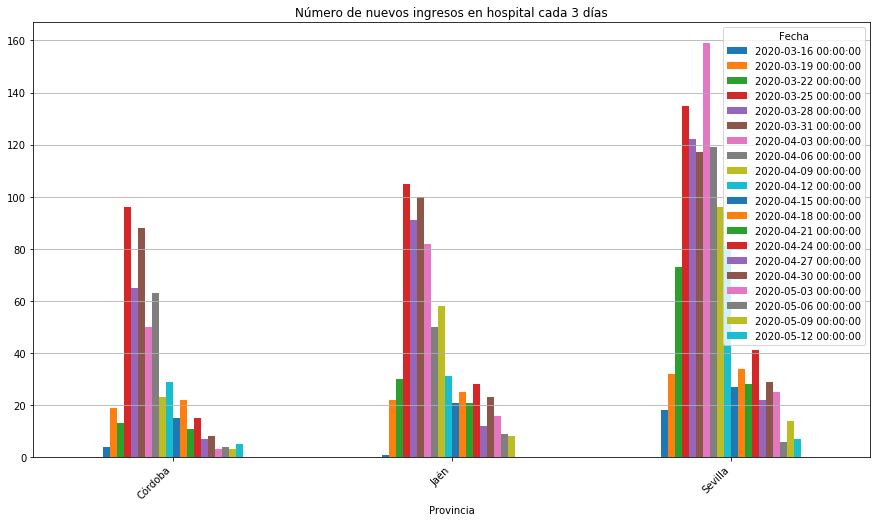

In [7]:
tit = 'Número de nuevos ingresos en hospital cada ' + str(c_freq) + ' días'
dfV0.loc[c_provincias]['Nuevos'].unstack().plot(kind='bar', title=tit, figsize=(15,8)).grid(axis='y')
plt.xticks(
    rotation=45,    
    horizontalalignment='right',
    fontweight='light',
)
plt.show()